In [2]:
# Pandas library for the pandas dataframes
import pandas as pd    
import numpy as np
import scipy.stats as stats
import scipy

# Import Scikit-Learn library for decision tree models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn import metrics
from sklearn.utils import resample
from sklearn.linear_model import Lasso


# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})
from IPython.display import clear_output

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv('testing notebooks/data/augmented_data.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Growth Temp (Celsius),Metal_mmol (mmol),Chalcogen_mmol (mmol),CA_mmol (mmol),Amines_mmol (mmol),Phosphines_mmol (mmol),S_I_amount (g),S_II_amount (g),...,x4_liquid parafin,x4_octadecene,x4_phenyl ether,x4_trioctylphosphine oxide,x5_None,x5_phosphinic acid,x5_trioctylphosphine oxide,Diameter_nm,Absorbance max (nm),PL max (nm)
0,0,0,1.105103,-0.437486,-0.243779,-0.525437,-0.416112,-0.165455,-0.123360,-0.302087,...,0,1,0,0,1,0,0,3.41,566.0,575.0
1,1,1,-0.062540,-0.472027,-0.436361,-0.305510,-0.498129,-0.375671,-0.241193,-0.302087,...,0,1,0,0,1,0,0,2.50,474.0,617.0
2,2,2,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.451959,-0.527427,-0.302087,...,0,1,0,0,1,0,0,1.99,450.4,497.0
3,3,3,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.13,471.6,510.0
4,4,4,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.27,486.0,517.0


In [4]:
feature_names = ['Growth Temp (Celsius)', 'Metal_mmol (mmol)', 'Chalcogen_mmol (mmol)',
             'Amines_mmol (mmol)', 'CA_mmol (mmol)', 'Phosphines_mmol (mmol)',
             'S_I_amount (g)', 'S_II_amount (g)', 'Time_min (min)',
             'x0_cadmium acetate', 'x0_cadmium acetate dihydrate',
             'x0_cadmium acetate dihydrate', 'x0_cadmium oxide',
             'x0_cadmium stearate', 'x0_dimethylcadmium', 'x1_None',
             'x1_benzoic acid', 'x1_dodecylphosphonic acid',
             'x1_ethylphosphonic acid', 'x1_lauric acid',
             'x1_myrstic acid', 'x1_oleic acid', 'x1_stearic acid',
             'x2_2-6-dimethylpyridine', 'x2_None', 'x2_aniline',
             'x2_benzylamine', 'x2_dioctylamine/hexadecylamine',
             'x2_dodecylamine', 'x2_heptylamine', 'x2_hexadecylamine',
             'x2_octadecylamine', 'x2_octylamine', 'x2_oleylamine',
             'x2_pyridine', 'x2_trioctylamine', 'x3_None', 'x3_diphenylphosphine',
             'x3_tributylphosphine', 'x3_trioctylphosphine',
             'x3_triphenylphosphine', 'x4_None', 'x4_liquid parafin',
             'x4_octadecene', 'x4_phenyl ether', 'x4_trioctylphosphine oxide',
             'x5_None', 'x5_phosphinic acid', 'x5_trioctylphosphine oxide']

target = ['Diameter_nm', 'Absorbance max (nm)', 'PL max (nm)']


In [5]:
#target is diameter_nm

X1 = df[feature_names]
Y1 = df[target[0]]

In [7]:
#target Absorbance max (nm)
X2= df[feature_names]
Y2= df[target[1]]

In [8]:
#target PL max (nm)
X3= df[feature_names]
Y3= df[target[2]]

In [9]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=8, shuffle = True)

In [10]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.25, random_state=8, shuffle = True)

In [11]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.25, random_state=8, shuffle = True)

In [12]:
regr = DecisionTreeRegressor()
regr.fit(X_train1, y_train1)
regr.fit(X_train2, y_train2)
regr.fit(X_train3, y_train3)


DecisionTreeRegressor()

In [13]:
y_pred1 = regr.predict(X_test1)
y_pred2 = regr.predict(X_test2)
y_pred3 = regr.predict(X_test3)

In [14]:
print("Squared Prediction error MSE: ", mean_squared_error(y_test1, y_pred1))
print("Squared Prediction error MSE: ", mean_squared_error(y_test2, y_pred2))
print("Squared Prediction error MSE: ", mean_squared_error(y_test3, y_pred3))

Squared Prediction error MSE:  301869.8424077901
Squared Prediction error MSE:  3485.689546196265
Squared Prediction error MSE:  912.5913178614667


In [62]:
#Size of the error that gives more weight to the large but infrequent errors than the mean
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

Root Mean Squared Error: 547.0188027449944
Root Mean Squared Error: 57.6182742146651
Root Mean Squared Error: 29.192601342373777


In [67]:
#Mean of the absolute values tells us how big of an error we can expect on average
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test3, y_pred3))

Mean Absolute Error: 545.356388859322
Mean Absolute Error: 39.96973365593221
Mean Absolute Error: 16.75423728983051


In [77]:
#difference between RMSE and MAE
#the larger the difference btween them the more inconsistent the error size
RMSE1 = np.sqrt(metrics.mean_squared_error(y_test1, y_pred1))
RMSE2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
RMSE3 = np.sqrt(metrics.mean_squared_error(y_test3, y_pred3))

MAE1 = metrics.mean_absolute_error(y_test1, y_pred1)
MAE2 = metrics.mean_absolute_error(y_test2, y_pred2)
MAE3 = metrics.mean_absolute_error(y_test3, y_pred3)

RMSE1_MAE1_diff = RMSE1 - MAE1
RMSE2_MAE2_diff = RMSE2 - MAE2
RMSE3_MAE3_diff = RMSE3 - MAE3

print(RMSE1_MAE1_diff)
print(RMSE2_MAE2_diff)
print(RMSE3_MAE3_diff)


1.6624138856724358
17.64854055873289
12.438364052543267


In [66]:
#R squared helps us know how well the regression model fits the observed data.
#Value is between 0 to 1
#Higher R suquared indicates a better fit for the model
print('R Squared Score is:', r2_score(y_test1, y_pred1))
print('R Squared Score is:', r2_score(y_test2, y_pred2))
print('R Squared Score is:', r2_score(y_test3, y_pred3))

R Squared Score is: -165283.5264487139
R Squared Score is: 0.35117556398834204
R Squared Score is: 0.5130058510915088


In [6]:
k_value_set=[]
for k in range(len(X1)):
    k_value_set.append(k)
print(k_value_set)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [89]:
#feature importance: insights into the data, the model, and represents the basics for 
#dimensionality reduction and feature selection
for importance, name in sorted(zip(regr.feature_importances_, X_train1.columns),reverse=True):
 print (name, importance)
 #plt.bar(name, importance)

Growth Temp (Celsius) 0.36787746042537806
Time_min (min) 0.2810705833052736
Metal_mmol (mmol) 0.08745402668503763
Phosphines_mmol (mmol) 0.08543387925200055
Chalcogen_mmol (mmol) 0.06825121316573082
x3_None 0.04016179838125439
x2_hexadecylamine 0.017464516652051686
S_I_amount (g) 0.01741691594042514
x1_None 0.005615060710478298
x3_trioctylphosphine 0.004355762988448688
x2_oleylamine 0.004303329983958866
x2_pyridine 0.0036045622429008743
x1_oleic acid 0.003105203038102108
x4_octadecene 0.0020283147045279466
x2_benzylamine 0.0019728908110252055
Amines_mmol (mmol) 0.0015413400781173728
x2_heptylamine 0.001363232462121332
S_II_amount (g) 0.0013581574095559523
CA_mmol (mmol) 0.0012945292495989424
x5_None 0.0011848100946210925
x2_octylamine 0.0009705042438599687
x5_phosphinic acid 0.0006303268275483264
x2_None 0.00041023336916825676
x2_dodecylamine 0.0003021426133584153
x5_trioctylphosphine oxide 0.00029088801799402326
x0_cadmium oxide 0.0002893401095875783
x1_stearic acid 0.0002489772378749

Variable Growth Temp and Time_min have higher importance in relation to other variables. They can be used as the main feature of the model

## Cross-validation 

In [96]:
loo = LeaveOneOut()
loo.get_n_splits(X1)
print(loo.get_n_splits(X1))
print(loo.split(X1))

234
<generator object BaseCrossValidator.split at 0x7f4a58300190>


In [99]:
MSE_loo = []
for train_index, test_index in loo.split(X1):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X1[train_index], X1[test_index]
    y_train1, y_test1 = y1[train_index], y1[test_index]
    #print("X train", X_train, "\nX test",  X_test, "\ny train", y_train, "\ny test", y_test)
    reg = linear_model.LinearRegression().fit(X_train1, y_train1)
    y_predict = reg.predict(X_test1)
    MSE_loo.append(mean_squared_error(y_test1, y_predict))
    
print(len(MSE_loo))

KeyError: "None of [Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,\n            ...\n            224, 225, 226, 227, 228, 229, 230, 231, 232, 233],\n           dtype='int64', length=233)] are in the [columns]"

In [103]:
reg = Lasso()

In [104]:
lassoParam = {
    'alpha': stats.uniform(0.0001, 0.01),
}

In [105]:
outer_cv = KFold(n_splits=5, shuffle=True, random_state=8) 
inner_cv = KFold(n_splits=5, shuffle=True, random_state=8)

In [108]:
nestedcv_inner = RandomizedSearchCV(reg, lassoParam, cv=inner_cv, n_iter=20, scoring='r2', 
                                    n_jobs=-1, random_state=8, refit=True) 

In [110]:
nestedcv_outer = cross_validate(nestedcv_inner,X_train1,y_train1,scoring='r2',cv=outer_cv,
                                n_jobs=-1,return_estimator=True)

In [111]:
print([nestedcv_outer['estimator'][i].best_params_ for i in range(5)])

[{'alpha': 0.009838552412004462}, {'alpha': 0.009838552412004462}, {'alpha': 0.009838552412004462}, {'alpha': 0.009838552412004462}, {'alpha': 0.009838552412004462}]


We have the same alpha value, the aplha value could have been smaller. However the good thing is that we are finding the same best parameter when walking through the same parameter candidate.
The above code has for reference https://towardsdatascience.com/hyperparameter-tuning-explained-d0ebb2ba1d35

In [112]:
print(nestedcv_outer['test_score'])

[0.06804396 0.20020538 0.34072598 0.21097997 0.22109344]


## Optimization

In [1]:
max_depth_values=[]
for k in range(len(X1)):
    k_value_set.append(k)
print(max_depth_values)

NameError: name 'X' is not defined

[1.403518976693902, 1.0053963987186156, 1.0412474450058424, 0.8276759247527495, 0.8268986151530764, 0.7998868174299761, 0.7114657547237148, 0.6704301396560306, 0.7350373053876428, 0.7250363809109689, 0.7285682950533584, 0.7223869712682203, 0.6722605384004238, 0.7337147495338985, 0.6844416671186442, 0.8295747866101696, 0.642094723898305, 0.7910916994915256, 0.8055337579661016, 0.7401166552542374, 0.6305617906779661, 0.6781538901694916, 0.8393264601694915, 0.6364456398305084, 0.6380586635593221, 0.7226216659322033, 0.7745950366101694, 0.6636229754237288, 0.7246463605084746, 0.76735178, 0.7527451889830508, 0.7195880511864406, 0.5924281077966101, 0.6794500791525425, 0.7085429322033899, 0.6847065533898306, 0.6218666015254237, 0.6708472144067796, 0.7585126381355932, 0.7463530277966102, 0.6978247645762712, 0.6868608105084746, 0.8150144533898305, 0.838230247118644, 0.7815039055932204, 0.7423128845762711, 0.7003214425423729, 0.7129774649152542, 0.6876653676271187, 0.7488538067796611, 0.62123849

Text(0.5, 1.0, 'MSE vs max depth')

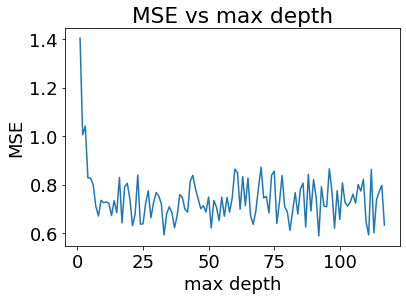

In [18]:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]

lst= []
for max_depth in max_depth_values:
    
    regr = DecisionTreeRegressor(max_depth = max_depth)
    regr.fit(X_train1, y_train1)
    
    y_pred1 = regr.predict(X_test1)
    
    MSE = mean_squared_error(y_test1, y_pred1)
    
    lst.append(MSE)

print(lst) #storing the MSE as a list
plt.plot(max_depth_values, lst)
plt.xlabel("max depth")
plt.ylabel("MSE")

plt.title("MSE vs max depth")

In [ ]:
#find the best max_depth value

"""
A wrapping function that helps the user decide on what max_depth to use. This function takes as parameters, 
a training dataframe, a testing dataframe and a list of values of max_depth to try. It returns a dictionary with max_depth 
as the keys and the training error of the test set. Error is measured by the mean squared error

"""